# Assignment 4:
# Clustering and Non-overlapping/overlapping Community Detection

This assignment consists of two parts. Part 1 contains 6 clustering algorithms of K-means, K-means ++, DBSCAN, Agglomerative clustering, Random Swap algorithm, Affinity propagation. Part 2 contains Girvan Newman and Spectral Graph Partitioning.

# Please complete your code at the region labelled # TODO ***

In [187]:
from google.colab import drive
drive.mount('/content/drive')
labdir = "/content/drive/MyDrive/Colab Notebooks/Assignment/Assignment4/data/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Part 1: Clustering

###Data preparation

At first, download the dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip and read the dataset description. Then upload and connect it to your VM.

In [188]:
import csv
import numpy as np
with open(labdir+"Dry_Bean_Dataset.csv") as csvfile:
    dry_bean_data = list(csv.reader(csvfile))

print(dry_bean_data[0:2])

[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class'], ['28395', '610.291', '208.1781167', '173.888747', '1.197191424', '0.549812187', '28715', '190.1410973', '0.763922518', '0.988855999', '0.958027126', '0.913357755', '0.007331506', '0.003147289', '0.834222388', '0.998723889', 'SEKER']]


Data preprocessing

In [189]:
lbl_dic = {'SEKER':0, 'BARBUNYA':1, 'BOMBAY':2, 'CALI':3, 'DERMASON':4, 'HOROZ':5, 'SIRA':6}
list(map(lambda x:x.append(lbl_dic[x.pop()]), dry_bean_data[1:]))
bean_data = np.array(dry_bean_data)[1:,:-1].astype(float)
bean_label = np.array(dry_bean_data)[1:,-1].astype(int)
print(bean_data.shape, bean_label.shape)
print(bean_data[0:3])
print(np.array(dry_bean_data)[1:,-1])

(13611, 16) (13611,)
[[2.83950000e+04 6.10291000e+02 2.08178117e+02 1.73888747e+02
  1.19719142e+00 5.49812187e-01 2.87150000e+04 1.90141097e+02
  7.63922518e-01 9.88855999e-01 9.58027126e-01 9.13357755e-01
  7.33150600e-03 3.14728900e-03 8.34222388e-01 9.98723889e-01]
 [2.87340000e+04 6.38018000e+02 2.00524796e+02 1.82734419e+02
  1.09735646e+00 4.11785251e-01 2.91720000e+04 1.91272751e+02
  7.83968133e-01 9.84985603e-01 8.87033637e-01 9.53860842e-01
  6.97865900e-03 3.56362400e-03 9.09850506e-01 9.98430331e-01]
 [2.93800000e+04 6.24110000e+02 2.12826130e+02 1.75931143e+02
  1.20971266e+00 5.62727317e-01 2.96900000e+04 1.93410904e+02
  7.78113248e-01 9.89558774e-01 9.47849473e-01 9.08774239e-01
  7.24391200e-03 3.04773300e-03 8.25870617e-01 9.99066137e-01]]
['0' '0' '0' ... '4' '4' '4']


###K-means and K-means++

K-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. K-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.

At first, download the dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip and read the dataset description. Then upload and connect it to your VM.

compute the clusters using K-means

In [190]:
from sklearn.cluster import KMeans
estimator = KMeans(n_clusters=7, init='random', n_init=10, max_iter=300)
estimator.fit(bean_data)
label_pred = estimator.labels_

Compute the accuracy, precision, recall，ARI (Adjusted Rand index) and the confusion matrix.

Accuracy: 0.3985012122547939
Precision: 0.37739482586014106
Recall: 0.36415486534539193
ARI: 0.37259053354469235


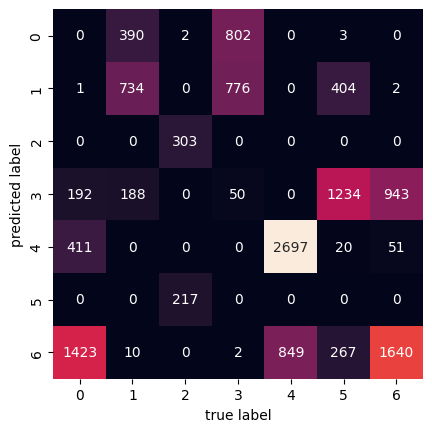

In [191]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import adjusted_rand_score
print("Accuracy: " + str(accuracy_score(bean_label, label_pred)))
print("Precision: " + str(precision_score(bean_label, label_pred, average='macro')))
print("Recall: " + str(recall_score(bean_label, label_pred, average='macro')))
print("ARI: " + str(adjusted_rand_score(bean_label, label_pred)))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(bean_label, label_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=lbl_dic.values(),
            yticklabels=lbl_dic.values())
plt.xlabel('true label')
plt.ylabel('predicted label');

compute the clusters using K-means++

In [202]:
from sklearn.cluster import KMeans
estimator = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=300)
estimator.fit(bean_data)
label_pred = estimator.labels_

Compute the accuracy, precision, recall，ARI (Adjusted Rand index) and the confusion matrix.

Accuracy: 0.12350304900448167
Precision: 0.07662897467675527
Recall: 0.0799118839937345
ARI: 0.37704632459190185


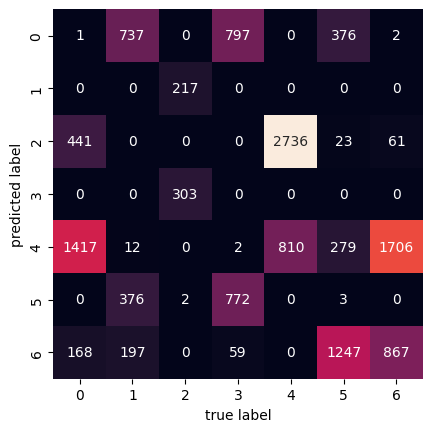

In [203]:
print("Accuracy: " + str(accuracy_score(bean_label, label_pred)))
print("Precision: " + str(precision_score(bean_label, label_pred, average='macro')))
print("Recall: " + str(recall_score(bean_label, label_pred, average='macro')))
print("ARI: " + str(adjusted_rand_score(bean_label, label_pred)))

mat = confusion_matrix(bean_label, label_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=lbl_dic.values(),
            yticklabels=lbl_dic.values())
plt.xlabel('true label')
plt.ylabel('predicted label');

###Density-based spatial clustering of applications with noise (DBSCAN)

DBSCAN is a density-based clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).

compute the clusters using DBSCAN

In [209]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(bean_data)
label_pred = dbscan.labels_

Compute the accuracy, precision, recall，ARI (Adjusted Rand index) and the confusion matrix.

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
ARI: 0.0


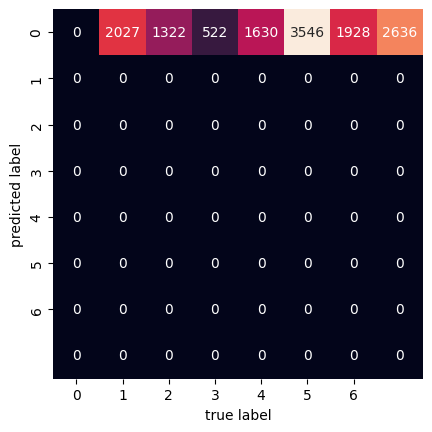

In [210]:
# import warnings
# warnings.filterwarnings("ignore")
print("Accuracy: " + str(accuracy_score(bean_label, label_pred)))
print("Precision: " + str(precision_score(bean_label, label_pred, average='macro')))
print("Recall: " + str(recall_score(bean_label, label_pred, average='macro')))
print("ARI: " + str(adjusted_rand_score(bean_label, label_pred)))

mat = confusion_matrix(bean_label, label_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=lbl_dic.values(),
            yticklabels=lbl_dic.values())
plt.xlabel('true label')
plt.ylabel('predicted label');

###Agglomerative clustering

The algorithm starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects. The result is a tree-based representation of the objects, named dendrogram.

compute the clusters using Agglomerative clustering

In [211]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='ward', n_clusters=3)
clustering.fit(bean_data)
label_pred = clustering.labels_

Compute the accuracy, precision, recall，ARI (Adjusted Rand index) and the confusion matrix.

Accuracy: 0.008081698626111234
Precision: 0.0030915376183918387
Recall: 0.007752484318838537
ARI: 0.2704398877261625


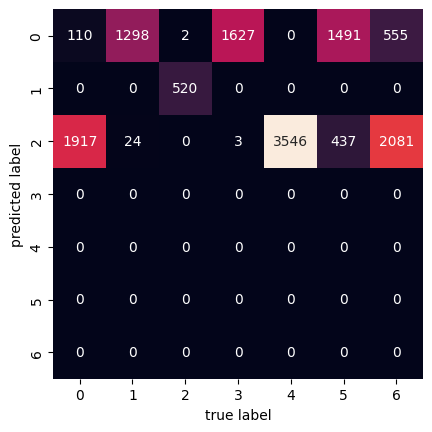

In [212]:
# warnings.filterwarnings("ignore")
print("Accuracy: " + str(accuracy_score(bean_label, label_pred)))
print("Precision: " + str(precision_score(bean_label, label_pred, average='macro')))
print("Recall: " + str(recall_score(bean_label, label_pred, average='macro')))
print("ARI: " + str(adjusted_rand_score(bean_label, label_pred)))

mat = confusion_matrix(bean_label, label_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=lbl_dic.values(),
            yticklabels=lbl_dic.values())
plt.xlabel('true label')
plt.ylabel('predicted label');

###Random Swap algorithm

Random swap algorithm aims at solving clustering by a sequence of prototype swaps, and by fine-tuning their exact location by k-means.

In [213]:
import random
import copy
from scipy.spatial import ConvexHull, distance
import collections

Random Swap algorithm

In [214]:
def PerformRS(X,iterationsRS,iterationKmean,clusters):

    """
    ----------
    Uses the k_means function implemented in the file.
    Parameters:
    ----------
    X : N*V dimensional array with N datapoints
        The actual coordinates of the datapoints

    iterationsRS : int
        Stops random swap after the amount of iterations

    clusters : int
        Initializes random_swap with given amount of clusters

    iterationKmean : int
        Stops k-means after the amount of  iterations
    ----------
    Output:
    ----------
    centroids : V dimensional array with C datapoints
        Predefined coordinates of centroids

    partition : scalar array with N datapoints
        Information about which datapoint belongs to which centroid
    ----------
    ----------

    """

    #/* initial solution */
    # select points ramdomly
    C = SelectRandomRepresentatives(X,clusters)
    P = OptimalPartition(C,X)

    err=ObjectiveFunction(P,C,X)
    print("Intinal MSE:",err)
    it=0
    while it <iterationsRS:
        C_new,j= RandomSwap(copy.deepcopy(C),X)
        P_new= LocalRepartition(copy.deepcopy(P),C_new,X,j)
        P_new,C_new= K_means(P_new,C_new,X,iterationKmean)
        new_err=ObjectiveFunction(P_new,C_new,X)
        if  new_err<err :
           P=copy.deepcopy(P_new)
           C=copy.deepcopy(C_new)
           print("Iteration:",it,"MSE=",new_err)
           err=new_err
        it+=1
    return P,C

Performs two K-means iterations

In [215]:
def K_means(P,C,X,T):
    for i in range(T):
        #/* OptimalRepresentatives-operation should be before
        #OptimalPartition-operation, because we have previously tuned
        #partition with LocalRepartition-operation */
        C = OptimalRepresentatives(P,X,len(C))
        P = OptimalPartition(C,X)

    return P,C

In [217]:
def OptimalPartition(C,X):
    N = len(X)
    P = [0]*N
    for i in range(N):
        P[i] = FindNearestRepresentative(C,X[i],len(C))
    return P

Initialize Sum[1..k] and Count[1..k] by zero values!

In [216]:
def OptimalRepresentatives(P,X,clusters):
    #/* sum vector and count for each partition */
    N=len(X)
    Sum=[0]*N
    Count=[0]*N
    K=clusters
    for i in range(N):
        j = P[i]
        Sum[j] = Sum[j] + X[i]
        Count[j] = Count[j] + 1
    #/* optimal representatives are average vectors */
    C=[[0]]*K
    for i in range(K):
        if Count[i] > 0 :
           C[i] = Sum[i] / Count[i]
    return C

In [218]:
def FindNearestRepresentative(C,x,clusters):
    K=clusters
    j = 0
    for i in range(1,K):
        if Dist(x,C[i]) < Dist(x,C[j]):

           j = i
    return j

In [219]:
def SelectRandomDataObject(C,X,m):
    N=len(X)
    ok = False
    while(not ok):
        i = Random(0,N)
        ok = True
        #/* eliminate duplicates */
        for j in range(m):
            if np.array_equal (C[j],X[i]):
                ok = False
    return X[i]

In [220]:
def SelectRandomRepresentatives(X,clusters):
    C=[[0,0]]*clusters
    for i in range (clusters):
        C[i] = SelectRandomDataObject(C,X,i);
    return C

In [221]:
def RandomSwap(C,X):
    j = Random(0,len(C))
    C[j] = SelectRandomDataObject(C,X,clusters)
    return C,j

In [222]:
def LocalRepartition(P,C,X,j):
    #k=clusters
    N=len(X)
    #/* object rejection */
    for i in range(N):
        if P[i] ==j:
            P[i] = FindNearestRepresentative(C,X[i],len(C))
    #/* object attraction */
    for i in range(N):
        if Dist(X[i],C[j]) < Dist(X[i],C[P[i]]):
            P[i] = j
    return P

In [223]:
def ObjectiveFunction(pred, centroid, data):
    #(MSE=TSE/(N*V)

    sum = 0
    N=len(data)
    for i in range(N):
        sum = sum +np.sum((data[i]-centroid[pred[i]])**2)
    return sum/(N*len(data[0]))

In [224]:
def Dist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))
def Random(a,b):
    re=random.randint(a,b-1)
    return re

Perform algorithm for given parameters.

In [225]:
iterationsRS = 10
iterationKmean = 2 # perform k-mean step, default is 2
clusters = 7

label_pred, C = PerformRS(bean_data, iterationsRS, iterationKmean, clusters)

Intinal MSE: 21543035.199080613
Iteration: 2 MSE= 6026443.256942765
Iteration: 3 MSE= 4561199.569998398
Iteration: 5 MSE= 4177541.131862383
Iteration: 7 MSE= 4075827.338153577
Iteration: 8 MSE= 3215500.8270340334


Compute the accuracy, precision, recall，ARI (Adjusted Rand index) and the confusion matrix.

Accuracy: 0.3018147086914995
Precision: 0.3542622302940651
Recall: 0.3444472490598428
ARI: 0.37798944931753986


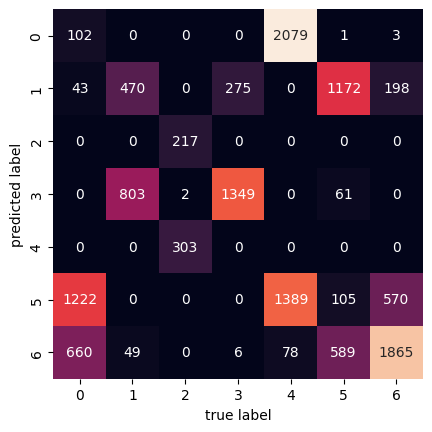

In [226]:
print("Accuracy: " + str(accuracy_score(bean_label, label_pred)))
print("Precision: " + str(precision_score(bean_label, label_pred, average='macro')))
print("Recall: " + str(recall_score(bean_label, label_pred, average='macro')))
print("ARI: " + str(adjusted_rand_score(bean_label, label_pred)))

mat = confusion_matrix(bean_label, np.array(label_pred))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=lbl_dic.values(),
            yticklabels=lbl_dic.values())
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

###Affinity Propagation

It is a clustering algorithm based on the concept of "message passing" between data points. Unlike clustering algorithms such as k-means or k-medoids, affinity propagation does not require the number of clusters to be determined or estimated before running the algorithm. Similar to k-medoids, affinity propagation finds "exemplars," members of the input set that are representative of clusters.

Compute the accuracy, precision, recall，ARI (Adjusted Rand index) and the confusion matrix.

In [228]:
from sklearn.cluster import AffinityPropagation
ap = AffinityPropagation(damping=0.9,max_iter=200,convergence_iter=15,copy=True,preference=None,affinity='euclidean',verbose=False)
ap.fit(bean_data)

bean_label = ap.labels_

In [230]:
# from sklearn.metrics import silhouette_score
# Get the exemplars (cluster centers) and the labels assigned to each data point
exemplars = ap.cluster_centers_indices_

# Number of clusters
n_clusters_ = len(exemplars)

# Print the number of clusters
print('Estimated number of clusters: %d' % n_clusters_)

# # You can compute and print other metrics like Silhouette Score
# silhouette_score = silhouette_score(bean_data, bean_label, metric='euclidean')
# print("Silhouette Score: %0.3f" % silhouette_score)


Estimated number of clusters: 54


Compute the accuracy, precision, recall and the confusion matrix.

Accuracy: 0.042539122768349126
Precision: 0.004896602093969442
Recall: 0.037037037037037035


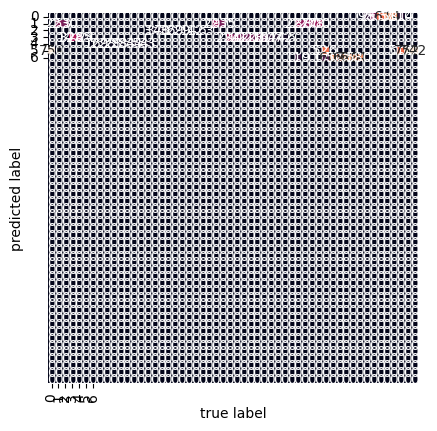

In [231]:
print("Accuracy: " + str(accuracy_score(bean_label, label_pred)))
print("Precision: " + str(precision_score(bean_label, label_pred, average='macro')))
print("Recall: " + str(recall_score(bean_label, label_pred, average='macro')))

mat = confusion_matrix(bean_label, label_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=lbl_dic.values(),
            yticklabels=lbl_dic.values())
plt.xlabel('true label')
plt.ylabel('predicted label');

##Part 2: Non-overlapping/overlapping Community Detection

At first, download the dataset from http://snap.stanford.edu/data/ca-GrQc.txt.gz and read the dataset description. Then upload 'CA-GrQc.txt' (delete the description of the above few lines) and load network.

In [240]:
import networkx as nx
# G = nx.karate_club_graph()
G = nx.Graph()
with open(labdir+"CA-GrQc.txt") as text:
  for line in text:
    vertices = line.strip().split("\t")
    source = int(vertices[0])
    target = int(vertices[1])
    G.add_edge(source, target)
print(len(G.nodes), len(G.edges))

5242 14496


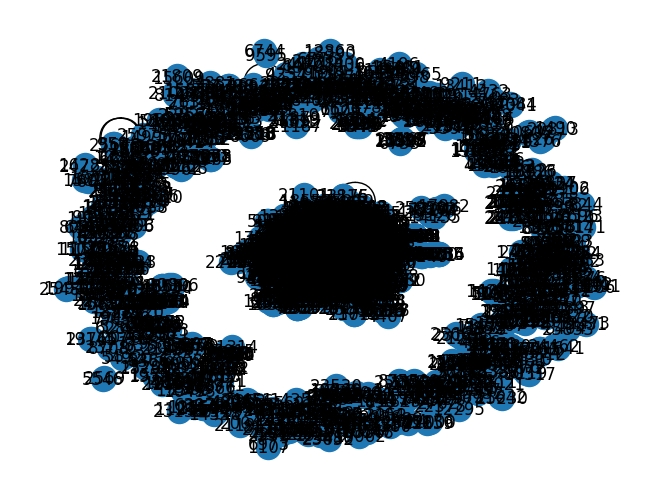

In [241]:
nx.draw(G, with_labels = True)

###Girvan–Newman algorithm
The Girvan–Newman algorithm detects communities by progressively removing edges from the original network. The connected components of the remaining network are the communities. Instead of trying to construct a measure that tells us which edges are the most central to communities, the Girvan–Newman algorithm focuses on edges that are most likely "between" communities.

Extract the edge with highest edge betweenness centrality score and remove it.

In [245]:
def edge_to_remove(graph):
  # Calculate edge betweenness centrality for all edges
  G_dict = nx.edge_betweenness_centrality(graph)

  # Sort edges based on betweenness centrality in descending order
  sorted_edges = sorted(G_dict.items(), key=lambda item: item[1], reverse=True)

  # Retrieve the edge with the highest betweenness centrality
  edge = sorted_edges[0][0]

  return edge

Find number of connected components

In [248]:
def girvan_newman(graph):
	sg_count = nx.number_connected_components(graph)

	while sg_count == 1:
		# Remove the edge with the highest betweenness centrality
		edge = edge_to_remove(graph)
		graph.remove_edge(*edge)

		# Update the number of connected components
		sg_count = nx.number_connected_components(graph)

	# Return the connected components after the algorithm completes
	return nx.connected_components(graph)

Find communities in the graph and the nodes forming the communities

In [250]:
c = girvan_newman(G.copy())

node_groups = []
# communities = []
for i, community in enumerate(c):
  node_groups.append(list(community))
  #communities.append(list(community))
  print(f"Community {i + 1}: Nodes = {list(community)}")

Community 1: Nodes = [8193, 24578, 8195, 16389, 24582, 24583, 8198, 16393, 8200, 24587, 24589, 8206, 24592, 8208, 24593, 8211, 24595, 22, 8215, 8216, 24, 26, 8219, 27, 24601, 16414, 8222, 8224, 16415, 29, 24614, 8231, 24616, 24617, 24615, 24620, 45, 46, 16429, 16433, 8254, 62, 65, 8261, 70, 71, 75, 78, 80, 81, 16469, 8279, 8280, 88, 8282, 16475, 16471, 93, 95, 16482, 16483, 16485, 16486, 106, 8299, 8298, 8301, 16495, 16496, 113, 16498, 8305, 114, 8310, 24696, 8312, 16506, 122, 124, 24699, 123, 16511, 128, 24705, 24706, 16513, 24708, 135, 16521, 24713, 140, 141, 24718, 8335, 24722, 8340, 24726, 24731, 24734, 16543, 8352, 16545, 163, 164, 165, 16553, 16554, 8365, 8367, 24753, 178, 179, 8369, 16565, 8374, 8375, 16568, 183, 24762, 8376, 8378, 185, 24765, 16575, 16576, 193, 192, 8387, 195, 197, 8386, 8391, 16584, 199, 200, 205, 8398, 16589, 16590, 24781, 16594, 8403, 214, 16598, 8408, 8184, 215, 16607, 16608, 16611, 231, 232, 24814, 238, 16624, 24819, 244, 245, 8437, 8441, 8442, 252, 253, 8

Compute Q（Modulartiy）

In [251]:
def cal_moduality(graph, communities):
    m = graph.number_of_edges()

    modularity = 0
    for community in communities:
        for i in community:
            for j in community:
                modularity += (graph.has_edge(i, j) - graph.degree[i] * graph.degree[j] / (2 * m))

    modularity /= (2 * m)

    return modularity

In [252]:
modularity = cal_moduality(G, node_groups)
print("Modularity (Q):", modularity)

Modularity (Q): 0.14147079357148712


###Spectral Graph Partitioning
A graphical partitioning based on the eigenvalues and eigenvectors of the Laplacian matrix of a graph.

In [253]:
# import networkx as nx
# G = nx.karate_club_graph()
import networkx as nx
# G = nx.karate_club_graph()
G = nx.Graph()
with open(labdir+"CA-GrQc_2.txt") as text:
  for line in text:
    vertices = line.strip().split(" ")
    source = int(vertices[0])
    target = int(vertices[1])
    G.add_edge(source, target)
print(len(G.nodes), len(G.edges))

4158 13428


Computing Laplacian matrix,the eigenvectors and eigenvalues.

In [254]:
from scipy import sparse
k = 3
A = nx.to_scipy_sparse_array(G, format='csc')
L = sparse.csgraph.laplacian(A, normed=True).tocsr()
vals, vecs = sparse.linalg.eigsh(L, k, sigma=0)
row_sums = np.sqrt(np.power(vecs, 2).sum(axis=1)).reshape(vecs.shape[0], 1)
U = np.real(vecs / row_sums)

Size of cluster 0: 4072
Size of cluster 1: 50
Size of cluster 2: 36


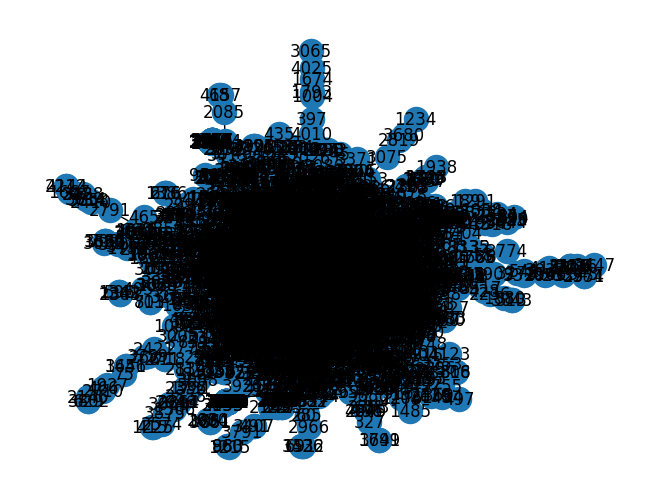

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k, init='k-means++', verbose=0)
labels = kmeans.fit_predict(U)
df = pd.DataFrame(list(zip(G.nodes, labels)), columns=['node', 'part'])
for i in range(k):
    csize = len(df[(df['part'] == i)])
    print('Size of cluster {}: {}'.format(i, csize))

values = [df.iloc[n]['part'] for n in G.nodes]
nx.draw(G, with_labels = True)

Compute Q（Modulartiy）

In [256]:
def cal_moduality(graph, partition):
	m = graph.number_of_edges()  # Use the number of edges instead of nodes

	modularity = 0
	for i, j in graph.edges:
			A_ij = 1  # Since there is an edge between nodes i and j
			k_i = graph.degree(i)
			k_j = graph.degree(j)
			delta_c = 1 if partition[i] == partition[j] else 0

			modularity += (A_ij - k_i * k_j / (2 * m)) * delta_c

	modularity /= (2 * m)

	return modularity

In [257]:
modularity = cal_moduality(G, labels)
print("Modularity (Q):", modularity)

Modularity (Q): 0.47183117465413693


###BigClam
BigClam is a popular graph mining algorithm that is capable of finding overlapping communities in networks
containing millions of nodes.
implements equation 2 of https://cs.stanford.edu/people/jure/pubs/bigclam-wsdm13.pdf

In [ ]:
def log_likelihood(F, A):
    A_soft = F.dot(F.T)
    # Next two lines are multiplied with the adjacency matrix, A
    # A is a {0,1} matrix, so we zero out all elements not contributing to the sum
    FIRST_PART = A*np.log(1.-np.exp(-1.*A_soft))
    sum_edges = np.sum(FIRST_PART)
    SECOND_PART = (1-A)*A_soft
    sum_nedges = np.sum(SECOND_PART)

    log_likeli = sum_edges - sum_nedges
    return log_likeli

Implements equation 3 of https://cs.stanford.edu/people/jure/pubs/bigclam-wsdm13.pdf.

i indicates the row under consideration.

In [ ]:
def gradient(F, A, i):
    N, C = F.shape

    neighbours = np.where(A[i])
    nneighbours = np.where(1-A[i])

    sum_neigh = np.zeros((C,))
    for nb in neighbours[0]:
        dotproduct = F[nb].dot(F[i])
        sum_neigh += F[nb]*sigm(dotproduct)

    sum_nneigh = np.zeros((C,))
    #Speed up this computation using eq.4
    for nnb in nneighbours[0]:
        sum_nneigh += F[nnb]

    grad = sum_neigh - sum_nneigh
    return grad

Initialize an F

In [ ]:
def train(A, C, iterations = 100):
    N = A.shape[0]
    F = np.random.rand(N,C)

    for n in range(iterations):
        for person in range(N):
            grad = gradient(F, A, person)

            F[person] += 0.005*grad

            F[person] = np.maximum(0.001, F[person]) # F should be nonnegative
        ll = log_likelihood(F, A)
        print('At step %5i/%5i ll is %5.3f'%(n, iterations, ll))
    return F

Perform BigClam algorithm

In [ ]:
def sigm(x):
    return np.divide(np.exp(-1.*x),1.-np.exp(-1.*x))

In [232]:
import pickle
adj = np.load(labdir+'adj.npy')
p2c = pickle.load(open(labdir+'p2c.pkl','rb'))
F = train(adj, 4)

for i,row in enumerate(F):
    # print(row)
    # print(p2c[i])
    print("Latent features for node {}: {}".format(p2c[i], row))

At step     0/  100 ll is -60442.308
At step     1/  100 ll is -12492483.205
At step     2/  100 ll is -90834494.920
At step     3/  100 ll is -30545218.214
At step     4/  100 ll is -28716147.420
At step     5/  100 ll is -31595887.261
At step     6/  100 ll is -28070206.586
At step     7/  100 ll is -39968478.640
At step     8/  100 ll is -40804580.191
At step     9/  100 ll is -45383585.913
At step    10/  100 ll is -43639349.761
At step    11/  100 ll is -43770580.565
At step    12/  100 ll is -41873373.697
At step    13/  100 ll is -35761088.162
At step    14/  100 ll is -46843005.442
At step    15/  100 ll is -42524630.970
At step    16/  100 ll is -38006370.469
At step    17/  100 ll is -38876409.919
At step    18/  100 ll is -48709159.324
At step    19/  100 ll is -42538797.947
At step    20/  100 ll is -40179685.590
At step    21/  100 ll is -40943500.000
At step    22/  100 ll is -43517836.313
At step    23/  100 ll is -44084628.381
At step    24/  100 ll is -43648768.717
At 

Compute Q（Modulartiy）

In [233]:
def cal_moduality(F, A):
    N, C = F.shape
    m = A.sum() / 2  # Total number of edges (undirected graph)

    # Compute the modularity matrix
    B = A - (np.outer(A.sum(axis=1), A.sum(axis=0)) / (2 * m))

    # Compute the modularity score
    modularity = np.trace(F.T @ B @ F) / (2 * m)

    return modularity

In [234]:
modularity = cal_moduality(F, adj)
print("Modularity (Q):", modularity)

Modularity (Q): 823.9587975779522
